# <center>Домашнє завдання № 1.<br> Аналіз даних доходів населення UCI Adult</center>

**В завданні пропонується за допомогою Pandas дати відповідь на кілька запитань по даним репозиторія UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

Унікальні значення ознак:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

# 1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from IPython.display import display, HTML
%matplotlib inline     
sns.set(color_codes=True)

# 2. Loading the data into the data frame.

In [2]:
# load data
df = pd.read_csv('adult.data.csv')
# To display the top 5 rows 
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.tail(5)                        # To display the botton 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# 3. Checking the types of data

In [4]:
display(
    HTML(
        df.dtypes.to_frame(name='types').to_html()
        )
    )

,types
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


# 4. Detecting missing values

<Axes: >

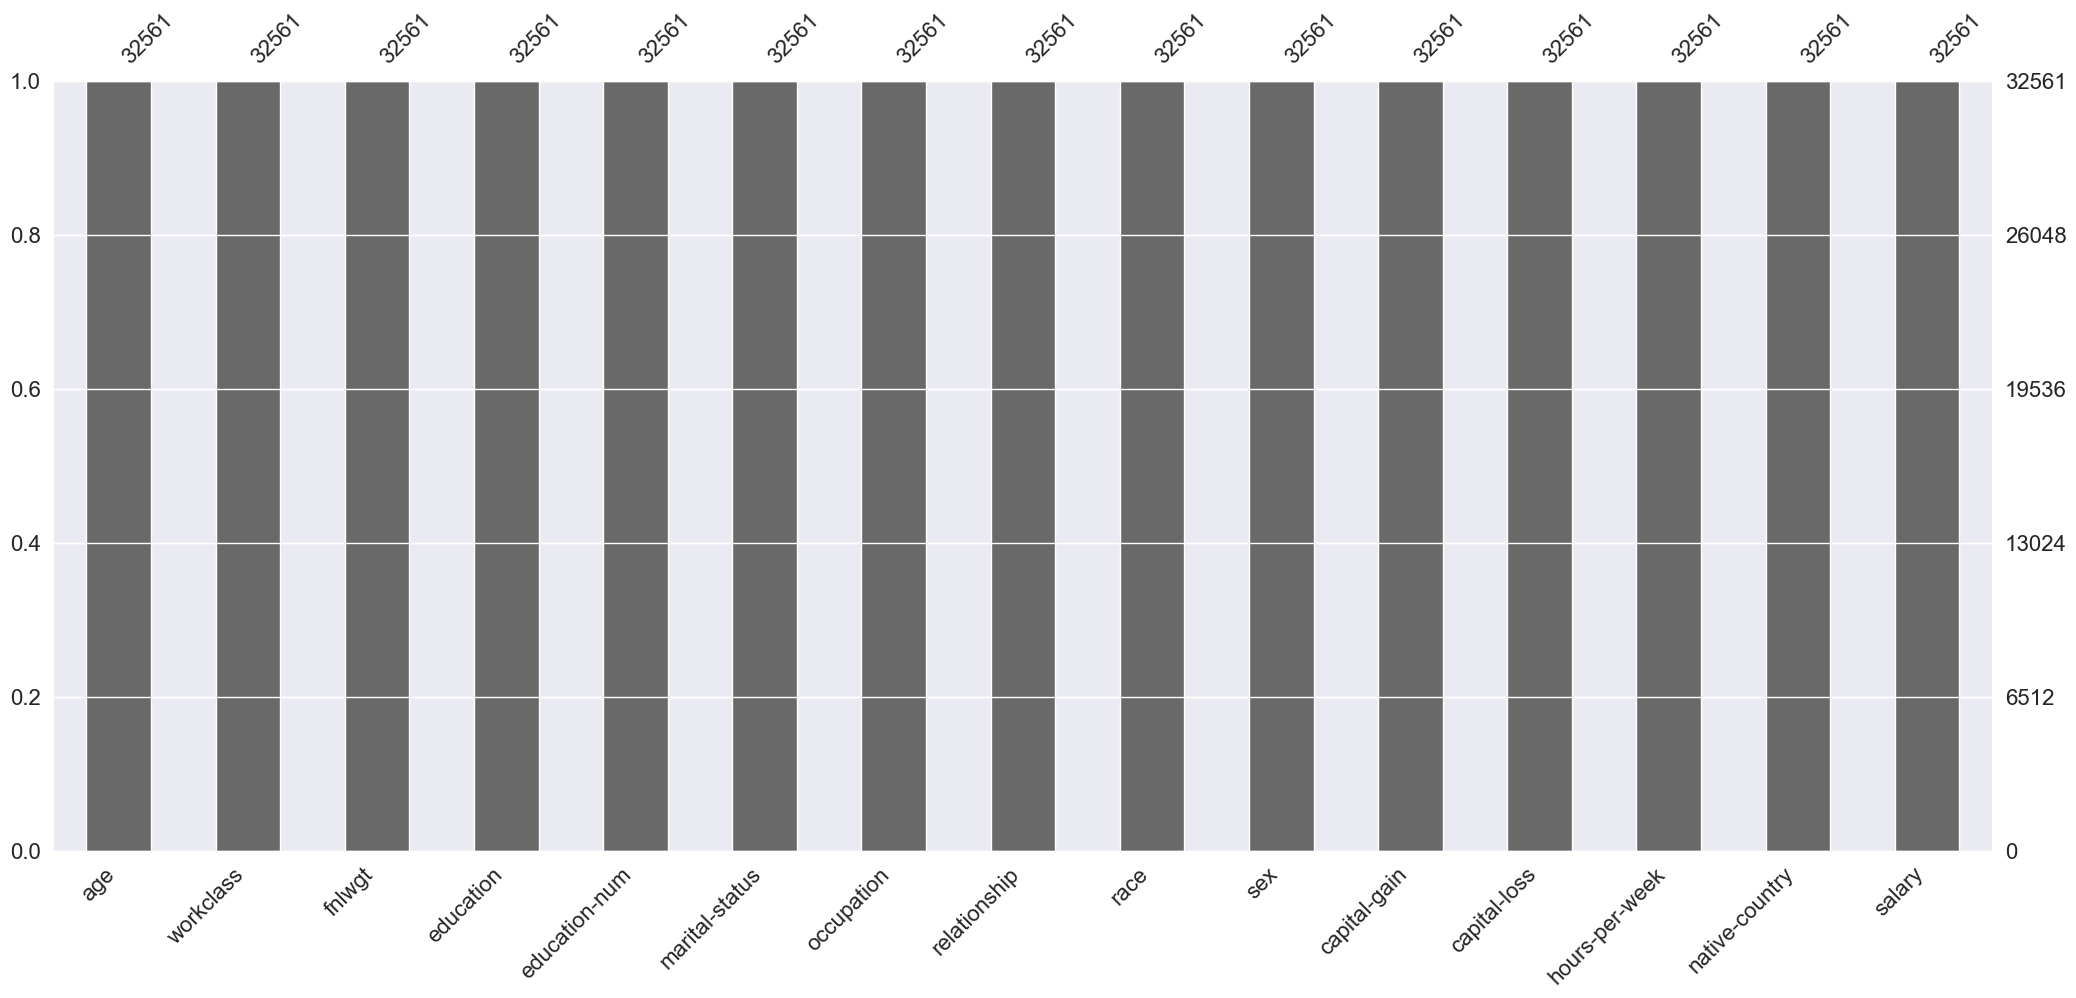

In [5]:
# Import missingno as msno
import missingno as msno

# Plot amount of missingness
msno.bar(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**1. Скільки чоловіків и жінок (ознака *sex*) представлено в цьому наборі даних?**

In [7]:
# Extract unique values from the 'sex' column in the DataFrame and convert them to a list
sex_labels = df.sex.unique().tolist()
sex_labels

['Male', 'Female']

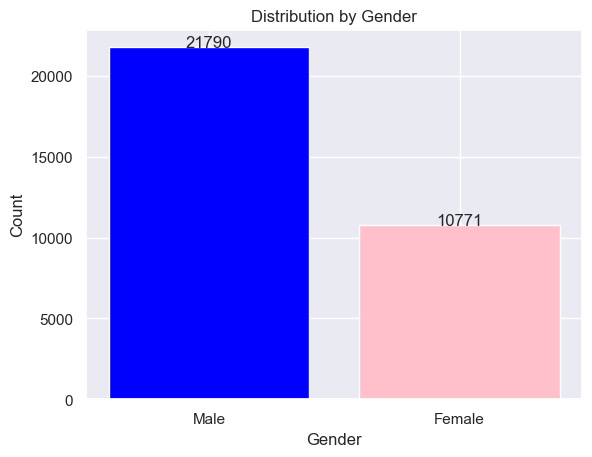

In [8]:
# Count occurrences of each category in the 'sex' column and convert counts to a list
counts = df['sex'].value_counts().tolist()

# Building the histogram
plt.bar(sex_labels, counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution by Gender')

# Adding data labels
for i in range(len(counts)):
    plt.text(sex_labels[i], counts[i] + 0.1, str(counts[i]), ha='center')
    
plt.show()

**2. Який середній вік (ознака *age*) жінок?**

In [9]:
# Filter DataFrame for rows where 'sex' is 'Female' and calculate the average age
female_data = df[df['sex'] == 'Female']
average_age_female = female_data['age'].mean()

print("Average age of women:", average_age_female)

Average age of women: 36.85823043357163


**3. Яка доля громадян Німеччини (ознака *native-country*)?**

In [10]:
"""
I am concerned about the presence of data with question marks (?), which may also include Germans, 
as this could affect the accuracy of further calculations.
"""
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [11]:
df[df['native-country'] == '?'].shape[0]

583

In [12]:
# Calculate the percentage of individuals in the DataFrame who are from Germany
total_count = df.shape[0]  # Total number of records in the DataFrame
germany_count = df[df['native-country'] == 'Germany'].shape[0]  # Count of records where 'native-country' is 'Germany'
germany_ratio = (germany_count / total_count) * 100  # Calculate the percentage of individuals from Germany
germany_ratio  # Display the Germany ratio as a percentage

0.42074874850281013

C:\Users\Admin\AppData\Local\Temp\ipykernel_624\3158892227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


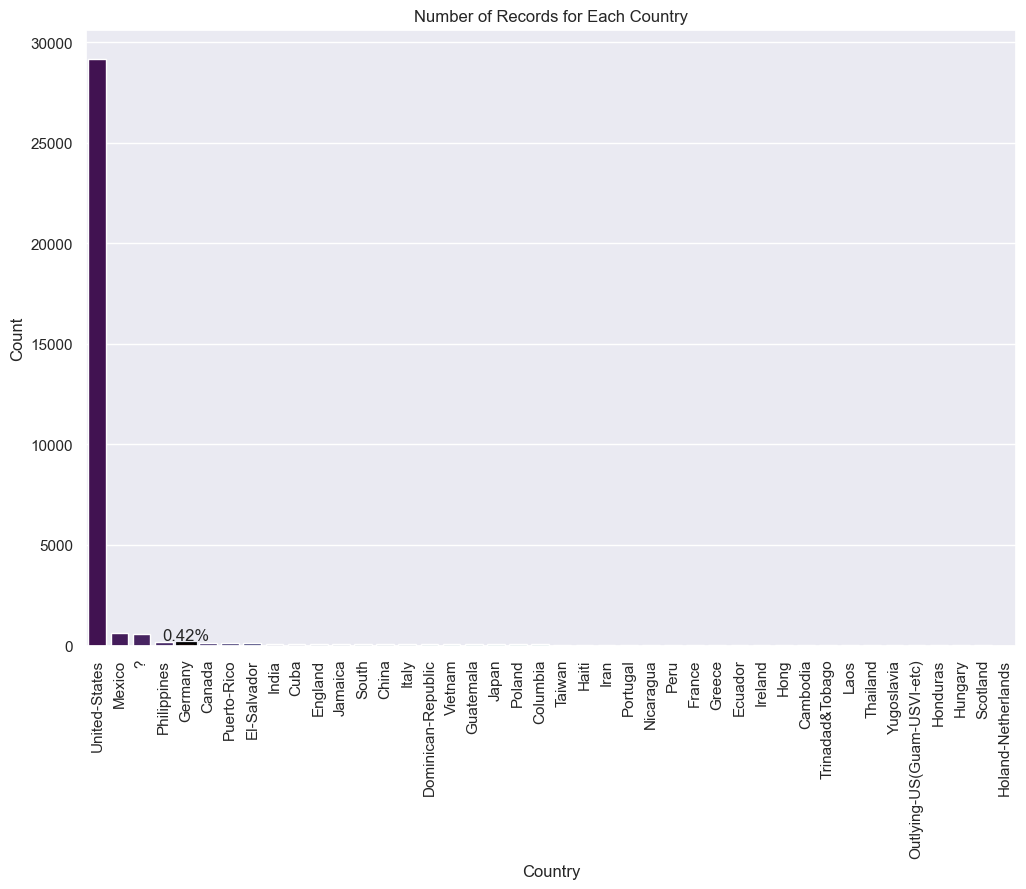

In [13]:
# Calculate counts of records for each country
country_counts = df['native-country'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Highlight Germany in red and display percentage on top of its bar
for bar, country in zip(bars.patches, country_counts.index):
    if country == 'Germany':
        bar.set_color('r')
        bar.set_edgecolor('black')
        bar.set_linewidth(2)
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, f'{germany_ratio:.2f}%', ha='center', va='bottom')

# Plot settings
plt.title('Number of Records for Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **4-5. Які средні значення та средньоквадратичні відхилення віку тих, хто отримує більше 50K на рік (ознака *salary*) і тих, хто отримує менше 50K на рік?**

In [14]:
# Calculate summary statistics (mean and standard deviation of age) grouped by salary level
summary_stats = df.groupby('salary')['age'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
summary_stats.columns = ['salary', 'mean_age', 'std_age']

summary_stats

,salary,mean_age,std_age
0,<=50K,36.783738,14.020088
1,>50K,44.249841,10.519028


# 6. Чи правда, що люди, які отримують більше 50k, мають як мінімум вищу освіту? (ознака education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

All individuals with salary >50K have higher education: False


C:\Users\Admin\AppData\Local\Temp\ipykernel_624\807777809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_salary['has_higher_education'] = high_salary['education'].isin(higher_education)


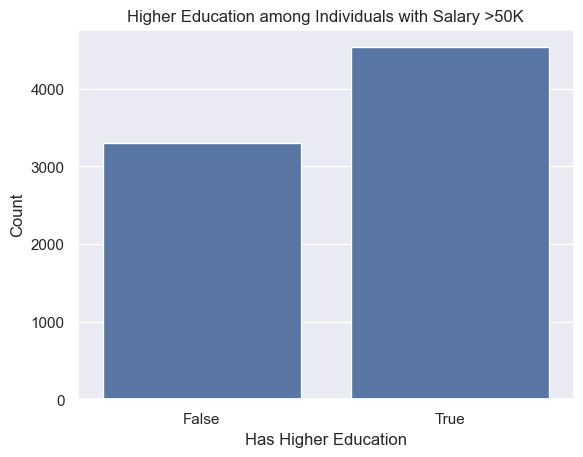

In [15]:
# Filter DataFrame to include only records where salary is greater than 50K
high_salary = df[df['salary'] == '>50K']

# List of education levels considered as higher education
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

# Add a new column to check if education level is in the higher education list
high_salary['has_higher_education'] = high_salary['education'].isin(higher_education)

# Check if all individuals with high salary have at least higher education
all_higher_education = high_salary['has_higher_education'].all()

# Print the result
print(f"All individuals with salary >50K have higher education: {all_higher_education}")

# Visualization: Bar plot for clarity
sns.countplot(data=high_salary, x='has_higher_education')
plt.title('Higher Education among Individuals with Salary >50K')
plt.xlabel('Has Higher Education')
plt.ylabel('Count')
plt.show()

In [16]:
from scipy.stats import chi2_contingency

# List of education levels considered as higher education
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

# Create a column to check for the presence of higher education
df['has_higher_education'] = df['education'].isin(higher_education)

# Create contingency table for income and presence of higher education
contingency_table = pd.crosstab(df['salary'].apply(lambda x: '>50K' if x == '>50K' else '<=50K'), df['has_higher_education'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create DataFrame with expected values
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Print contingency table and expected values
print("Contingency Table:")
display(HTML(contingency_table.to_html()))
print("\nExpected Values:")
display(HTML(expected_df.to_html()))

# Check hypothesis at significance level of 0.05
alpha = 0.05
if p < alpha:
    print(f"\nReject null hypothesis, p-val={p:.4f} < {alpha}: There is a significant difference in the presence of higher education between different income levels.")
else:
    print(f"\nFail to reject null hypothesis, p-val={p:.4f} > {alpha}: There is no significant difference in the presence of higher education between different income levels.")


Contingency Table:


has_higher_education,False,True
salary,,
<=50K,18739,5981
>50K,3306,4535



Expected Values:


has_higher_education,False,True
salary,,
<=50K,16736.353306,7983.646694
>50K,5308.646694,2532.353306



Reject null hypothesis, p-val=0.0000 < 0.05: There is a significant difference in the presence of higher education between different income levels.


# 7. Порахуйте статистику віку для кожної раси (ознака race) і кожної статі. Використайте groupby и describe. Знайдіть таким сином максимальний вік чоловіків раси Amer-Indian-Eskimo

In [17]:
# Calculate age statistics grouped by race and sex
age_stats = df.groupby(['race', 'sex'])['age'].describe()

# Print age statistics for each race and sex
print("Age statistics for each race and sex:")
display(
    HTML(
        age_stats.to_html()
    )
)

# Find the maximum age of males in the Amer-Indian-Eskimo race
max_age_amer_indian_male = df[(df['race'] == 'Amer-Indian-Eskimo') & (df['sex'] == 'Male')]['age'].max()
print("\nMaximum age of males in the Amer-Indian-Eskimo race:", max_age_amer_indian_male)

Age statistics for each race and sex:



Maximum age of males in the Amer-Indian-Eskimo race: 82


# 8. Серед кого більша доля багатіших (>50K): серед одружених чи не одружених чоловіків (ознака marital-status)? За одружених вважаємо тих, у кого marital-status починається із Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), всі інші - не одружені.

In [18]:
# Define married statuses considered as married
married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

# Filter DataFrame for males who have marital status starting with 'Married'
filtered_df_married = df[df['marital-status'].str.startswith(tuple(married_statuses)) & (df['sex'] == 'Male')]

# Group by 'salary' and count the number of individuals in each salary category
salary_counts_married = filtered_df_married.groupby(['salary']).size().to_frame(name='count_married')

# Filter DataFrame for male individuals not in specified marital statuses
filtered_df_not_married = df.query('(`marital-status` not in @married_statuses) and (`sex`=="Male")')

# Group by 'salary' and calculate counts of each salary category
salary_counts_not_married = filtered_df_not_married.groupby(['salary']).size().to_frame(name='count_not_married')

# Combine the two DataFrames based on 'salary' categories
combined_counts = pd.concat([salary_counts_married, salary_counts_not_married], axis=1)

# Display the combined pivot table showing counts for both married and not married males
combined_counts

,count_married,count_not_married
salary,,
<=50K,7576,7552
>50K,5965,697


# Observations:

> Married Men:
>> 7576: Earn <= 50K.  
>> 5965: Earn > 50K.

> Non-Married Men:
>> 7552: Earn <= 50K.  
>> 697: Earn > 50K.

## Analysis:

In the <= 50K salary category:
* The number of married and non-married men is almost equal (7576 vs 7552).

In the > 50K salary category:
* There are more married men (5965) compared to non-married men (697).

<p style='color:red'> It cannot be said that women rape men to earn more. ))) </p>

# 9. Яку максимальну кількість годин в тиждень працює людина (ознака hours-per-week)? Скільки людей працюють таку кількість годин і який відсоток серед них багатих?

In [19]:
# Find the maximum number of hours worked per week
max_hours_per_week = df['hours-per-week'].max()

# Count the number of people who work the maximum number of hours per week
people_with_max_hours = df[df['hours-per-week'] == max_hours_per_week].shape[0]

# Count the number of rich individuals (>50K) among those who work the maximum number of hours
rich_count = df[(df['hours-per-week'] == max_hours_per_week) & (df['salary'] == '>50K')].shape[0]

# Calculate the percentage of rich individuals among those who work the maximum number of hours
rich_percentage = (rich_count / people_with_max_hours) * 100

# Display the results
print(f"Maximum number of hours worked per week: {max_hours_per_week}")
print(f"Number of people working {max_hours_per_week} hours per week: {people_with_max_hours}")
print(f"Percentage of rich individuals among these people: {rich_percentage:.2f}%")


Maximum number of hours worked per week: 99
Number of people working 99 hours per week: 85
Percentage of rich individuals among these people: 29.41%


# 10. Порахуйте середню тривалість роботи на тиждень (hours-per-week) серед багатих і бідних (salary) для кожної країни (native-country).

In [20]:
# Group by 'native-country' and 'salary', then calculate the mean hours per week
average_hours_per_country_salary = df.groupby(['native-country', 'salary'])['hours-per-week'].mean().unstack()

# Display the resulting DataFrame
display(average_hours_per_country_salary)

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
